# Assignment for Data Processing in Python

## COVID-19 Spread Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5) # make figures larger

In [16]:
#Load data

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

infected.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181574,181666,181725,181808,181912,181987,182033,182072,182149,182228
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277409,277444,277663,277940,278211,278504,278793,279077,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265971,265975,265985,265993,266006,266015,266025,266030,266038,266049
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


Preprocess the data by collapsing province/state. Some countries may have various states that all need to be combined

In [17]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.drop(columns=['Lat', 'Long'], inplace=True)
recovered.drop(columns=['Lat', 'Long'], inplace=True)
deaths.drop(columns=['Lat', 'Long'], inplace=True)

infected.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,181574,181666,181725,181808,181912,181987,182033,182072,182149,182228
Albania,0,0,0,0,0,0,0,0,0,0,...,277141,277409,277444,277663,277940,278211,278504,278793,279077,279077
Algeria,0,0,0,0,0,0,0,0,0,0,...,265971,265975,265985,265993,266006,266015,266025,266030,266038,266049
Andorra,0,0,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43774,43774,43774,43774,43774,43774
Angola,0,0,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [43]:
def get_ctry_df(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    df['country'] = country
    return df


In [66]:
countries = pd.read_csv(countries_dataset_url)
countries = countries[countries['Province_State'].isna()]

countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,3.892834e+07
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2.877800e+06
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,4.385104e+07
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,7.726500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
849,716,ZW,ZWE,716.0,NaN,NaN,NaN,Zimbabwe,-19.015438,29.154857,Zimbabwe,1.486293e+07
850,36,AU,AUS,36.0,NaN,NaN,NaN,Australia,-25.000000,133.000000,Australia,2.545970e+07
859,124,CA,CAN,124.0,NaN,NaN,NaN,Canada,60.000000,-95.000000,Canada,3.824611e+07
876,156,CN,CHN,156.0,NaN,NaN,NaN,China,35.861700,104.195450,China,1.411779e+09


In [92]:
def get_ctry_pop(country):
    return(countries[countries['Country_Region'] == country]['Population'])



my_ctrs = pd.DataFrame({'country':['Serbia', 'France', 'Cuba', 'US', 'Italy', 'Ghana']})
my_ctrs['population'] = my_ctrs['country'].apply(lambda x: get_ctry_pop(x)).agg(sum, axis=1)
#my_ctrs['country'].apply(lambda x: get_ctry_pop(x)).agg(sum, axis=1)

In [93]:
my_ctrs

,country,population
0,Serbia,8737370.0
1,France,65249843.0
2,Cuba,11326616.0
3,US,329466283.0
4,Italy,60461828.0
5,Ghana,31072945.0


Calculate daily new cases of infections, recoveries and deaths

In [96]:
serbia = get_ctry_df('Serbia')
serbia['ninfected'] = serbia['infected'].diff()
serbia['nrecovered'] = serbia['recovered'].diff()
serbia['ndeaths'] = serbia['deaths'].diff()
serbia['Rt'] = serbia['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

france = get_ctry_df('France')
france['ninfected'] = france['infected'].diff()
france['nrecovered'] = france['recovered'].diff()
france['ndeaths'] = france['deaths'].diff()
france['Rt'] = france['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

cuba = get_ctry_df('Cuba')
cuba['ninfected'] = cuba['infected'].diff()
cuba['nrecovered'] = cuba['recovered'].diff()
cuba['ndeaths'] = cuba['deaths'].diff()
cuba['Rt'] = cuba['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

usa = get_ctry_df('US')
usa['ninfected'] = usa['infected'].diff()
usa['nrecovered'] = usa['recovered'].diff()
usa['ndeaths'] = usa['deaths'].diff()
usa['Rt'] = usa['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

italy = get_ctry_df('Italy')
italy['ninfected'] = italy['infected'].diff()
italy['nrecovered'] = italy['recovered'].diff()
italy['ndeaths'] = italy['deaths'].diff()
italy['Rt'] = italy['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

ghana = get_ctry_df('Ghana')
ghana['ninfected'] = ghana['infected'].diff()
ghana['nrecovered'] = ghana['recovered'].diff()
ghana['ndeaths'] = ghana['deaths'].diff()
ghana['Rt'] = ghana['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

df = pd.concat([serbia, france, cuba, usa, italy, ghana])

df.tail()

,infected,recovered,deaths,country,ninfected,nrecovered,ndeaths,Rt
2022-06-23,164612,0,1448,Ghana,71.0,0.0,0.0,1.991579
2022-06-24,164843,0,1448,Ghana,231.0,0.0,0.0,0.816106
2022-06-25,164843,0,1448,Ghana,0.0,0.0,0.0,0.816106
2022-06-26,164843,0,1448,Ghana,0.0,0.0,0.0,0.249793
2022-06-27,165749,0,1449,Ghana,906.0,0.0,1.0,1.201903


### 1. Plot R_t graphs for 5-6 different countries on one plot for comparison, or using several plots side-by-side

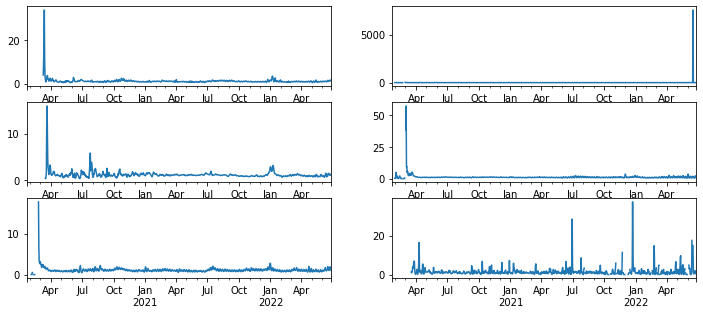

In [117]:
#df[(df.index.year==2021) & (df.index.month==5)].groupby('country')['Rt'].plot(legend=True)

fig, axes = plt.subplots(nrows=3,ncols=2)
serbia['Rt'].plot(ax = axes[0,0], subplots=True)
france['Rt'].plot(ax = axes[0,1], subplots=True)
cuba['Rt'].plot(ax = axes[1,0], subplots=True)
usa['Rt'].plot(ax = axes[1,1], subplots=True)
italy['Rt'].plot(ax = axes[2,0], subplots=True)
ghana['Rt'].plot(ax = axes[2,1], subplots=True)

plt.show()

### 2. See how the number of deaths and recoveries correlate with number of infected cases.

<AxesSubplot:xlabel='ninfected', ylabel='ndeaths'>

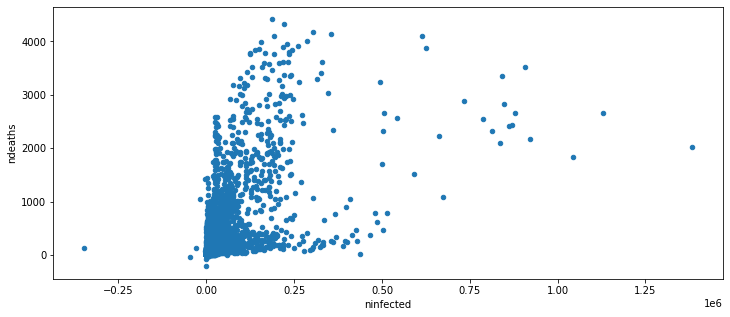

In [134]:
df.plot.scatter(x='ninfected', y='ndeaths')

## 3.  Find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.

### Italy

<AxesSubplot:>

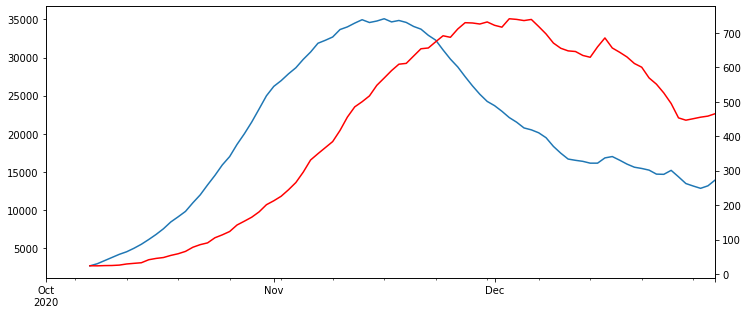

In [205]:
ax1 = italy[(italy.index.year==2020) & (italy.index.month>=10) & (italy.index.month<=12)].iloc[:, 4].rolling(7).mean().plot()
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
italy[(italy.index.year==2020) & (italy.index.month>=10) & (italy.index.month<=12)].iloc[:, 6].rolling(7).mean().plot(ax=ax2, color='r')


### USA

<AxesSubplot:>

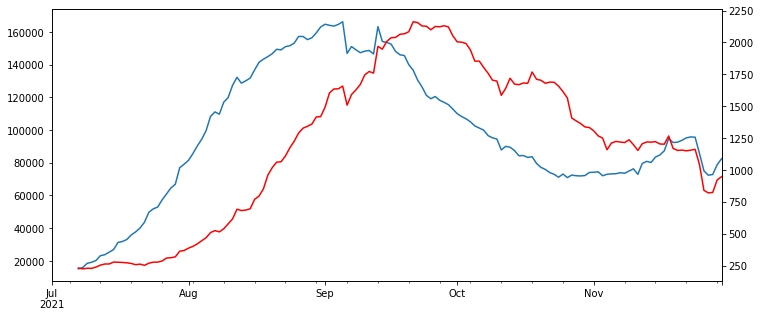

In [204]:
ax1 = usa[(usa.index.year==2021) & (usa.index.month>=7) & (usa.index.month<=11)].iloc[:, 4].rolling(7).mean().plot()
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
usa[(usa.index.year==2021) & (usa.index.month>=7) & (usa.index.month<=11)].iloc[:, 6].rolling(7).mean().plot(ax=ax2, color='r')


### France

<AxesSubplot:>

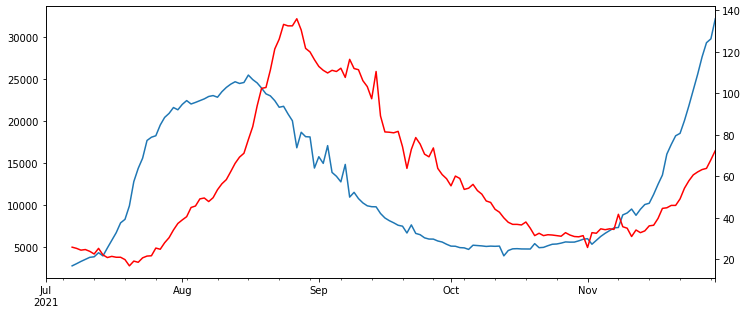

In [218]:
ax1 = france[(france.index.year==2021) & (france.index.month>=7) & (france.index.month<=11)].iloc[:, 4].rolling(7).mean().plot()
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
france[(france.index.year==2021) & (france.index.month>=7) & (france.index.month<=11)].iloc[:, 6].rolling(7).mean().plot(ax=ax2, color='r')


Based on these plots, it looks like the disease takes approximately 2-3 weeks

## 4. Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

In order to calculate fatality rate, we need to divide the number of new deaths in some time frame by the number of new infections within that same window. Let's say the disease lasts about 3 weeks (21 days). To get the fatality rate among people who got infected within the same time frame, we need to divide the number of deaths that occurred in timeframe X by the number of infections that occurred in timeframe X - 21 days

### USA

            infected  recovered   deaths country  ninfected  nrecovered  \
2022-06-23  86793392          0  1015342      US   147733.0         0.0   
2022-06-24  86909476          0  1015789      US   116084.0         0.0   
2022-06-25  86948848          0  1015933      US    39372.0         0.0   
2022-06-26  86967399          0  1015938      US    18551.0         0.0   
2022-06-27  87092233          0  1016208      US   124834.0         0.0   

            ndeaths        Rt  ninfected_shifted21  fatality_rate  
2022-06-23    386.0  1.822943             121689.0       0.317202  
2022-06-24    447.0  2.175215             157414.0       0.283965  
2022-06-25    144.0  2.089618              26457.0       0.544279  
2022-06-26      5.0  0.803894              14791.0       0.033804  
2022-06-27    270.0  0.555405             162275.0       0.166384  


<AxesSubplot:>

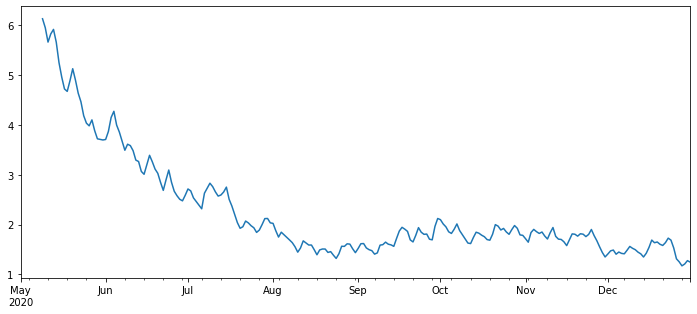

In [273]:
usa['ninfected_shifted21'] = usa['ninfected'].shift(21)
usa['fatality_rate'] = 100 * usa['ndeaths'] / usa['ninfected_shifted21']
print(usa.tail())

#usa.iloc[:, 9].rolling(12).mean().plot()
usa[(usa.index.year==2020) & (usa.index.month>=5) & (usa.index.month<=12)].iloc[:, 9].rolling(9).mean().plot()

### Italy

            infected  recovered  deaths country  ninfected  nrecovered  \
2022-06-23  18071634          0  167967   Italy    57432.0         0.0   
2022-06-24  18128044          0  168018   Italy    56410.0         0.0   
2022-06-25  18184917          0  168058   Italy    56873.0         0.0   
2022-06-26  18234242          0  168102   Italy    49325.0         0.0   
2022-06-27  18259261          0  168165   Italy    25019.0         0.0   

            ndeaths        Rt  ninfected_shifted21  fatality_rate  
2022-06-23     75.0  1.351036              17718.0       0.423298  
2022-06-24     51.0  1.896787               9692.0       0.526207  
2022-06-25     40.0  1.510010              22809.0       0.175369  
2022-06-26     44.0  1.299728              15522.0       0.283469  
2022-06-27     63.0  0.974817               8616.0       0.731198  


<AxesSubplot:>

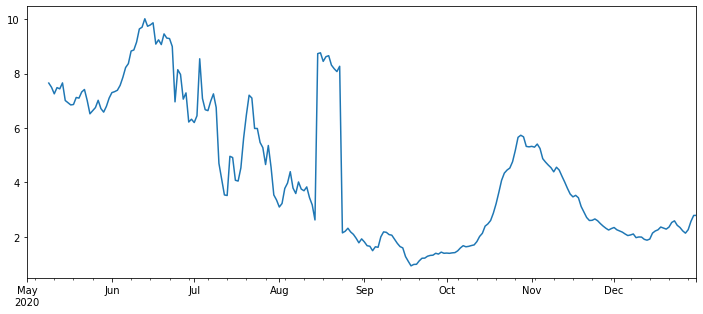

In [277]:
italy['ninfected_shifted21'] = italy['ninfected'].shift(21)
italy['fatality_rate'] = 100 * italy['ndeaths'] / italy['ninfected_shifted21']
print(italy.tail())

#italy.iloc[:, 9].rolling(12).mean().plot()
italy[(italy.index.year==2020) & (italy.index.month>=5) & (italy.index.month<=12)].iloc[:, 9].rolling(9).mean().plot()


### France

            infected  recovered  deaths country  ninfected  nrecovered  \
2022-06-23  30634890          0  150307  France    79852.0         0.0   
2022-06-24  30714200          0  150356  France    79310.0         0.0   
2022-06-25  30714200          0  150356  France        0.0         0.0   
2022-06-26  30714200          0  150356  France        0.0         0.0   
2022-06-27  30879062          0  150445  France   164862.0         0.0   

            ndeaths        Rt  ninfected_shifted21  fatality_rate  
2022-06-23     40.0  3.429406              25376.0       0.157629  
2022-06-24     49.0  2.181952              25130.0       0.194986  
2022-06-25      0.0  1.200379              25172.0       0.000000  
2022-06-26      0.0  0.577096              20542.0       0.000000  
2022-06-27     89.0  0.686551               6236.0       1.427197  


<AxesSubplot:>

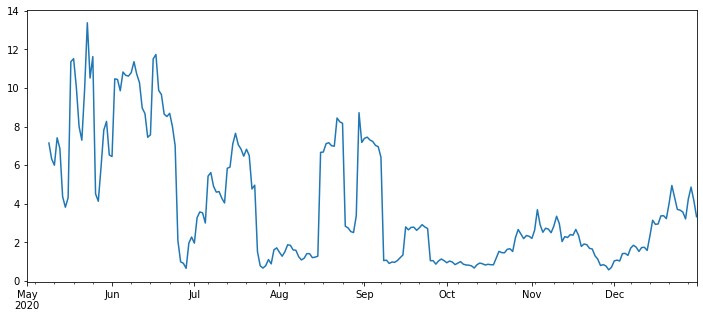

In [275]:
france['ninfected_shifted21'] = france['ninfected'].shift(21)
france['fatality_rate'] = 100 * france['ndeaths'] / france['ninfected_shifted21']
print(france.tail())

#france.iloc[:, 9].rolling(12).mean().plot()
france[(france.index.year==2020) & (france.index.month>=5) & (france.index.month<=12)].iloc[:, 9].rolling(9).mean().plot()


According to the plots above, the fatality rates decreased dramatically over time. This makes sense because in the beginning of the pandemic people had not built any sort of immnumity to the virus. But as we inherently developed immunity and vaccines were available, fatality decreased

## COVID-19 Papers Analysis

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt